### Load Libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from ggplot import *
import seaborn as sns

### Read Data preprocessed train and test data

In [2]:
print(os.getcwd())
data = pd.read_csv("pp_final_train.csv", header=0)
data.head()

,Flight,YearMonthDay,ScheduledDeparture,DepHour,Origin,O_WeatherStationID,O_HourlyPrecip,O_SkyConditions,O_Visibility,O_DBT,...,D_StationPressure,D_GroundHeight,D_StationHeight,D_BarometerHeight,D_Latitude,D_Longitude,D_TimeZone,ScheduledTravelTime,Distance,ActualArrivalTimeStamp
0,MCO_MSY_39477,20040704,04/07/04 13:45,13,MCO,12815,0.0,SCT,10.0,91.0,...,29.98,4,20,7,29.59,-90.15,6,100,550,04/07/04 14:25
1,SFO_BUR_51674,20040102,02/01/04 11:00,11,SFO,23234,0.0,FEW,10.0,51.0,...,29.25,731,732,734,34.12,-118.22,8,70,326,02/01/04 12:10
2,AVL_CVG_38861,20040705,05/07/04 16:59,16,AVL,3812,0.0,CLR,10.0,86.0,...,29.03,882,883,885,39.02,-84.40,5,70,275,05/07/04 18:09
3,RIC_CVG_34907,20041122,22/11/04 13:26,13,RIC,13740,0.0,SCT,10.0,64.0,...,29.13,882,883,885,39.02,-84.40,5,94,413,22/11/04 15:00
4,FLL_LGA_51738,20040927,27/09/04 12:05,12,FLL,12849,0.0,SCT,10.0,89.0,...,30.06,36,31,39,40.47,-73.53,5,165,1076,27/09/04 14:50


In [3]:
print(os.getcwd())
test_data = pd.read_csv("pp_final_test.csv", header=0)
test_data.head()

,Flight,YearMonthDay,ScheduledDeparture,DepHour,Origin,O_WeatherStationID,O_HourlyPrecip,O_SkyConditions,O_Visibility,O_DBT,...,D_WindGustValue,D_StationPressure,D_GroundHeight,D_StationHeight,D_BarometerHeight,D_Latitude,D_Longitude,D_TimeZone,ScheduledTravelTime,Distance
0,CLT_CMH_83790,20051101,01/11/05 17:15,17,CLT,13881,0.0,SCT,10.0,60.0,...,0.0,29.13,846,816,849,39.59,-82.53,5,78,346
1,DSM_CVG_65378,20050312,12/03/05 12:50,12,DSM,14933,0.0,FEW,9.0,27.0,...,0.0,28.71,882,883,885,39.02,-84.40,5,96,505
2,FNT_CVG_79736,20050922,22/09/05 05:45,5,FNT,14826,0.0,FEW,8.0,61.0,...,0.0,29.08,882,883,885,39.02,-84.40,5,77,275
3,LAX_SJC_74576,20051104,04/11/05 09:37,9,LAX,23174,0.0,BKN,10.0,63.0,...,0.0,30.08,87,50,90,37.22,-121.56,8,72,308
4,SAV_LGA_59071,20050725,25/07/05 11:48,11,SAV,3822,0.0,FEW,10.0,90.0,...,15.0,29.75,36,31,39,40.47,-73.53,5,131,722


### Data Analysis

In [4]:
print("Shape of data is: {}".format(data.shape))
print (" ")
print("List of columns is: ", list(data.columns))
print (" ")
data.dtypes

Shape of data is: (7861, 45)
 
List of columns is:  ['Flight', 'YearMonthDay', 'ScheduledDeparture', 'DepHour', 'Origin', 'O_WeatherStationID', 'O_HourlyPrecip', 'O_SkyConditions', 'O_Visibility', 'O_DBT', 'O_DewPointTemp', 'O_RelativeHumidityPercent', 'O_WindSpeed', 'O_WindDirection', 'O_WindGustValue', 'O_StationPressure', 'O_GroundHeight', 'O_StationHeight', 'O_BarometerHeight', 'O_Latitude', 'O_Longitude', 'O_TimeZone', 'ScheduledArrival', 'ArrHour', 'Destination', 'D_WeatherStationID', 'D_HourlyPrecip', 'D_SkyConditions', 'D_Visibility', 'D_DBT', 'D_DewPointTemp', 'D_RelativeHumidityPercent', 'D_WindSpeed', 'D_WindDirection', 'D_WindGustValue', 'D_StationPressure', 'D_GroundHeight', 'D_StationHeight', 'D_BarometerHeight', 'D_Latitude', 'D_Longitude', 'D_TimeZone', 'ScheduledTravelTime', 'Distance', 'ActualArrivalTimeStamp']
 


Flight                        object
YearMonthDay                   int64
ScheduledDeparture            object
DepHour                        int64
Origin                        object
O_WeatherStationID             int64
O_HourlyPrecip               float64
O_SkyConditions               object
O_Visibility                 float64
O_DBT                        float64
O_DewPointTemp               float64
O_RelativeHumidityPercent    float64
O_WindSpeed                  float64
O_WindDirection               object
O_WindGustValue              float64
O_StationPressure            float64
O_GroundHeight                 int64
O_StationHeight                int64
O_BarometerHeight              int64
O_Latitude                   float64
O_Longitude                  float64
O_TimeZone                     int64
ScheduledArrival              object
ArrHour                        int64
Destination                   object
D_WeatherStationID             int64
D_HourlyPrecip               float64
D

### Imputing Null values & Target variable creation

In [5]:
for col in data.columns:
    if ((data[col].isnull().sum()) > 0 ):
        print("The number of null values in: {} -> {} ".format(col,data[col].isnull().sum()))

The number of null values in: O_HourlyPrecip -> 25 
The number of null values in: O_SkyConditions -> 111 
The number of null values in: O_Visibility -> 108 
The number of null values in: O_DBT -> 106 
The number of null values in: O_DewPointTemp -> 107 
The number of null values in: O_RelativeHumidityPercent -> 108 
The number of null values in: O_WindSpeed -> 107 
The number of null values in: O_WindDirection -> 107 
The number of null values in: O_WindGustValue -> 107 
The number of null values in: O_StationPressure -> 106 
The number of null values in: D_HourlyPrecip -> 22 
The number of null values in: D_SkyConditions -> 99 
The number of null values in: D_Visibility -> 99 
The number of null values in: D_DBT -> 96 
The number of null values in: D_DewPointTemp -> 97 
The number of null values in: D_RelativeHumidityPercent -> 100 
The number of null values in: D_WindSpeed -> 98 
The number of null values in: D_WindDirection -> 98 
The number of null values in: D_WindGustValue -> 98 

In [6]:
Origin_na_cols = ['O_HourlyPrecip','O_Visibility','O_DBT','O_DewPointTemp', 'O_RelativeHumidityPercent','O_WindSpeed','O_WindGustValue',
           'O_StationPressure']
Destination_na_cols = [ 'D_HourlyPrecip','D_Visibility','D_DBT','D_DewPointTemp', 'D_RelativeHumidityPercent','D_WindSpeed','D_WindGustValue',
           'D_StationPressure']

for col in Origin_na_cols:
    data[col] = data.groupby(['Origin'])[col].transform(lambda x: x.fillna(x.mean()))
    
for col in Destination_na_cols:
    data[col] = data.groupby(['Destination'])[col].transform(lambda x: x.fillna(x.mean()))
    
for col in Origin_na_cols:
    data[col] = data[col].fillna(data[col].mean())
    
for col in Destination_na_cols:
    data[col] = data[col].fillna(data[col].mean())
    
data['O_SkyConditions'] = data['O_SkyConditions'].fillna('CLR')
data['D_SkyConditions'] = data['D_SkyConditions'].fillna('CLR')

data['O_WindDirection'] = data['O_WindDirection'].fillna('VRB')
data['D_WindDirection'] = data['D_WindDirection'].fillna('VRB')

data['O_WindDirection'] = np.where(data['O_WindDirection'] == 'VRB', '006', data['O_WindDirection'])
data['O_WindDirection'] = data['O_WindDirection'].astype('int64')

data['D_WindDirection'] = np.where(data['D_WindDirection'] == 'VRB', '006', data['D_WindDirection'])
data['D_WindDirection'] = data['D_WindDirection'].astype('int64')

In [7]:
for col in data.columns:
    print("The number of null values in: {} -> {} ".format(col,data[col].isnull().sum()))

The number of null values in: Flight -> 0 
The number of null values in: YearMonthDay -> 0 
The number of null values in: ScheduledDeparture -> 0 
The number of null values in: DepHour -> 0 
The number of null values in: Origin -> 0 
The number of null values in: O_WeatherStationID -> 0 
The number of null values in: O_HourlyPrecip -> 0 
The number of null values in: O_SkyConditions -> 0 
The number of null values in: O_Visibility -> 0 
The number of null values in: O_DBT -> 0 
The number of null values in: O_DewPointTemp -> 0 
The number of null values in: O_RelativeHumidityPercent -> 0 
The number of null values in: O_WindSpeed -> 0 
The number of null values in: O_WindDirection -> 0 
The number of null values in: O_WindGustValue -> 0 
The number of null values in: O_StationPressure -> 0 
The number of null values in: O_GroundHeight -> 0 
The number of null values in: O_StationHeight -> 0 
The number of null values in: O_BarometerHeight -> 0 
The number of null values in: O_Latitude 

In [8]:
import time
import datetime

def comp_dates(d1, d2):
    return (time.mktime(time.strptime(d2,"%d/%m/%y %H:%M"))-\
            time.mktime(time.strptime(d1,"%d/%m/%y %H:%M")))/60

def Strip_month(d1):
    return (datetime.datetime.strptime(d1,"%d/%m/%y %H:%M")).month

def Strip_day(d1):
    return (datetime.datetime.strptime(d1,"%d/%m/%y %H:%M")).day

data['Time1'] = data['ScheduledArrival'].astype('str')
data['Time2'] = data['ActualArrivalTimeStamp'].astype('str')

data["difference"] = data.apply(lambda row: comp_dates(row['Time1'], row['Time2']), axis=1)

data['Time1'] = data['ScheduledDeparture'].astype('str')
data['Time2'] = data['ScheduledArrival'].astype('str')

data['Month'] = data.apply(lambda row: Strip_month(row['Time1']), axis=1)
data['DayofMonth'] = data.apply(lambda row: Strip_day(row['Time1']), axis=1)

### Target Variable Creation

In [9]:
data['FlightDelayStatus'] = np.where(data['difference'] > 15.0, "Yes", "No")
classDistribution = data['FlightDelayStatus'].value_counts()
print('Class distribution:')
print(classDistribution)

Class distribution:
No     6342
Yes    1519
Name: FlightDelayStatus, dtype: int64


### drop unused columns

In [10]:
data.columns

Index(['Flight', 'YearMonthDay', 'ScheduledDeparture', 'DepHour', 'Origin',
       'O_WeatherStationID', 'O_HourlyPrecip', 'O_SkyConditions',
       'O_Visibility', 'O_DBT', 'O_DewPointTemp', 'O_RelativeHumidityPercent',
       'O_WindSpeed', 'O_WindDirection', 'O_WindGustValue',
       'O_StationPressure', 'O_GroundHeight', 'O_StationHeight',
       'O_BarometerHeight', 'O_Latitude', 'O_Longitude', 'O_TimeZone',
       'ScheduledArrival', 'ArrHour', 'Destination', 'D_WeatherStationID',
       'D_HourlyPrecip', 'D_SkyConditions', 'D_Visibility', 'D_DBT',
       'D_DewPointTemp', 'D_RelativeHumidityPercent', 'D_WindSpeed',
       'D_WindDirection', 'D_WindGustValue', 'D_StationPressure',
       'D_GroundHeight', 'D_StationHeight', 'D_BarometerHeight', 'D_Latitude',
       'D_Longitude', 'D_TimeZone', 'ScheduledTravelTime', 'Distance',
       'ActualArrivalTimeStamp', 'Time1', 'Time2', 'difference', 'Month',
       'DayofMonth', 'FlightDelayStatus'],
      dtype='object')

In [11]:
drop_col = ['O_WeatherStationID','O_TimeZone','D_WeatherStationID','D_TimeZone','Time1', 'Time2']
data = data.drop(drop_col, axis=1)

In [12]:
data['DepHour'].describe()

count    7861.000000
mean       11.710215
std         3.538337
min         2.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        18.000000
Name: DepHour, dtype: float64

In [13]:
bins = [0, 6, 12, 18, 24]
bin_names = ['Early Morning', 'Morning', 'Afternoon', 'Night']
data['Dept_bin'] = pd.cut(data['DepHour'], bins, labels = bin_names)

bins = [2, 7, 12, 18, 24]
bin_names = ['Early Morning', 'Morning', 'Afternoon', 'Night']
data['Arr_bin'] = pd.cut(data['ArrHour'], bins, labels = bin_names)

bins = [50, 400, 650, 1000, 5000] 
bin_names = ['Min', 'Moderate', 'Avg', 'High']
data['distance_bin'] = pd.cut(data['Distance'], bins, labels = bin_names)

bins = [30, 80, 120, 150, 600] 
bin_names = ['Min', 'Moderate', 'Avg', 'High']
data['Traveltime_bin'] = pd.cut(data['ScheduledTravelTime'], bins, labels = bin_names)

In [14]:
data.describe()

,YearMonthDay,DepHour,O_HourlyPrecip,O_Visibility,O_DBT,O_DewPointTemp,O_RelativeHumidityPercent,O_WindSpeed,O_WindDirection,O_WindGustValue,...,D_GroundHeight,D_StationHeight,D_BarometerHeight,D_Latitude,D_Longitude,ScheduledTravelTime,Distance,difference,Month,DayofMonth
count,7.861000e+03,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,...,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.00000,7861.000000
mean,2.004073e+07,11.710215,0.012988,8.784440,67.725745,52.680668,63.455373,8.320037,160.963745,2.889328,...,834.865920,843.882076,840.098461,36.687598,-92.156701,129.623839,743.764025,22.424628,7.12085,15.441292
std,2.831776e+02,3.538337,0.080579,2.437673,15.311699,15.291202,21.567697,4.713721,111.483083,7.528392,...,1202.390869,1212.530498,1199.485756,5.290329,16.075175,63.272072,522.629372,48.930993,2.82233,9.049019
min,2.004010e+07,2.000000,0.000000,0.000000,8.000000,-4.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.200000,-162.360000,61.000000,69.000000,0.000000,1.00000,1.000000
25%,2.004051e+07,9.000000,0.000000,9.000000,58.000000,43.000000,49.000000,5.000000,60.000000,0.000000,...,87.000000,65.000000,98.000000,33.380000,-100.290000,83.000000,368.000000,0.000000,5.00000,7.000000
50%,2.004072e+07,12.000000,0.000000,10.000000,70.000000,56.000000,65.000000,8.000000,170.000000,0.000000,...,559.000000,596.000000,562.000000,37.370000,-87.450000,112.000000,595.000000,0.000000,7.00000,15.000000
75%,2.004092e+07,15.000000,0.000000,10.000000,79.000000,65.000000,81.000000,11.000000,250.000000,0.000000,...,901.000000,899.000000,904.000000,40.470000,-81.040000,155.000000,951.000000,0.000000,9.00000,23.000000
max,2.004113e+07,18.000000,1.780000,10.000000,109.000000,80.000000,100.000000,40.000000,360.000000,55.000000,...,6180.000000,6535.000000,6183.000000,71.170000,-64.580000,562.000000,4962.000000,180.000000,11.00000,31.000000


### Label Encoder

In [15]:
cat_val = ['Month','DayofMonth','Dept_bin','Arr_bin','Traveltime_bin','distance_bin']

for val in cat_val:
    print("The unique labels for {} -> {}".format(val, set(data[val])))
    print("")

The unique labels for Month -> {1, 3, 5, 7, 9, 11}

The unique labels for DayofMonth -> {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}

The unique labels for Dept_bin -> {'Afternoon', 'Early Morning', 'Morning'}

The unique labels for Arr_bin -> {'Afternoon', 'Night', 'Early Morning', 'Morning'}

The unique labels for Traveltime_bin -> {'Avg', 'Moderate', 'Min', 'High'}

The unique labels for distance_bin -> {'Avg', 'Moderate', 'Min', 'High'}



In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Origin_Point"] = le.fit_transform(data["Origin"])
Orig = list(le.classes_)

data["Destination_Point"] = le.fit_transform(data["Destination"])
Dest = list(le.classes_)

data["Dept_bin"] = le.fit_transform(data["Dept_bin"])
Dept = list(le.classes_)

data["Arr_bin"] = le.fit_transform(data["Arr_bin"])
Arr = list(le.classes_)

data["Traveltime_bin"] = le.fit_transform(data["Traveltime_bin"])
Traveltime = list(le.classes_)

data["distance_bin"] = le.fit_transform(data["distance_bin"])
distance = list(le.classes_)

In [17]:
data.head()

,Flight,YearMonthDay,ScheduledDeparture,DepHour,Origin,O_HourlyPrecip,O_SkyConditions,O_Visibility,O_DBT,O_DewPointTemp,...,difference,Month,DayofMonth,FlightDelayStatus,Dept_bin,Arr_bin,distance_bin,Traveltime_bin,Origin_Point,Destination_Point
0,MCO_MSY_39477,20040704,04/07/04 13:45,13,MCO,0.0,SCT,10.0,91.0,71.0,...,0.0,7,4,No,0,0,3,3,135,147
1,SFO_BUR_51674,20040102,02/01/04 11:00,11,SFO,0.0,FEW,10.0,51.0,44.0,...,0.0,1,2,No,2,2,2,2,195,34
2,AVL_CVG_38861,20040705,05/07/04 16:59,16,AVL,0.0,CLR,10.0,86.0,65.0,...,0.0,7,5,No,0,0,2,2,15,52
3,RIC_CVG_34907,20041122,22/11/04 13:26,13,RIC,0.0,SCT,10.0,64.0,54.0,...,0.0,11,22,No,0,0,3,3,181,52
4,FLL_LGA_51738,20040927,27/09/04 12:05,12,FLL,0.0,SCT,10.0,89.0,74.0,...,0.0,9,27,No,2,0,1,1,79,120


In [18]:
data["O_SkyConditions"] = le.fit_transform(data["O_SkyConditions"])
distance = list(le.classes_)

data["D_SkyConditions"] = le.fit_transform(data["D_SkyConditions"])
distance = list(le.classes_)

In [19]:
data["FlightDelayStatus"] = le.fit_transform(data["FlightDelayStatus"])
FlightDelayStatus = list(le.classes_)

### Model Building

In [20]:
from sklearn import cross_validation

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn import model_selection

C:\Users\Prajwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
pred_var = ['Month', 'DayofMonth', 'distance_bin', 'Traveltime_bin', 
            'Origin_Point','Dept_bin','O_HourlyPrecip','O_SkyConditions', 'O_Visibility','O_DBT','O_DewPointTemp',
            'O_RelativeHumidityPercent','O_WindSpeed','O_WindDirection','O_WindGustValue','O_StationPressure','O_GroundHeight',
            'O_StationHeight','O_BarometerHeight','O_Latitude','O_Longitude',
            'Destination_Point', 'Arr_bin','D_HourlyPrecip', 'D_SkyConditions', 'D_Visibility', 'D_DBT', 'D_DewPointTemp',
            'D_RelativeHumidityPercent','D_WindSpeed','D_WindDirection','D_WindGustValue','D_StationPressure','D_GroundHeight', 
            'D_StationHeight', 'D_BarometerHeight', 'D_Latitude', 'D_Longitude']

data[pred_var].head()

,Month,DayofMonth,distance_bin,Traveltime_bin,Origin_Point,Dept_bin,O_HourlyPrecip,O_SkyConditions,O_Visibility,O_DBT,...,D_RelativeHumidityPercent,D_WindSpeed,D_WindDirection,D_WindGustValue,D_StationPressure,D_GroundHeight,D_StationHeight,D_BarometerHeight,D_Latitude,D_Longitude
0,7,4,3,3,135,0,0.0,4,10.0,91.0,...,63.0,7.0,360,0.0,29.98,4,20,7,29.59,-90.15
1,1,2,2,2,195,2,0.0,2,10.0,51.0,...,96.0,8.0,160,0.0,29.25,731,732,734,34.12,-118.22
2,7,5,2,2,15,0,0.0,1,10.0,86.0,...,71.0,6.0,210,0.0,29.03,882,883,885,39.02,-84.40
3,11,22,3,3,181,0,0.0,4,10.0,64.0,...,86.0,0.0,0,0.0,29.13,882,883,885,39.02,-84.40
4,9,27,1,1,79,2,0.0,4,10.0,89.0,...,60.0,10.0,180,0.0,30.06,36,31,39,40.47,-73.53


In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data[pred_var],
                                                          data['FlightDelayStatus'],
                                                          test_size=0.25,
                                                          random_state=7)

In [23]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.786258 (0.011173)
SVM: 0.803222 (0.011342)
DT: 0.772182 (0.016912)
KNN: 0.775407 (0.016712)
RF: 0.826802 (0.015868)
LDA: 0.829008 (0.013100)
LR: 0.829858 (0.013020)


In [27]:
def modelfit(alg):
    print("Model: ", alg)
    
    alg.fit(X_train, y_train)
    train_preds = alg.predict(X_train)
    preds = alg.predict(X_test)
       
    print("Metrics")
    print("")
    
    print("Training data Confusion Matrix")
    print("================================")
    conf_mat_train = confusion_matrix(y_train, train_preds)
    print(conf_mat_train)
    print("Accuracy on Train: ", accuracy_score(y_train, train_preds))
    print("AUC Score on Train: ", roc_auc_score(y_train, train_preds))
    print("")
    
    print("Test data Confusion Matrix")
    print("================================")
    conf_mat_test = confusion_matrix(y_test, preds)
    print(conf_mat_test)
    print("Accuracy on Test: ", accuracy_score(y_test, preds))
    print("AUC Score on Test: ", roc_auc_score(y_test, preds))

    print("Classification report on Test: ")
    print("")
    print(classification_report(y_test, preds))
    
    fpr, tpr, _ = roc_curve(y_test, preds)
    auc = np.trapz(tpr,fpr)
    print('Area under the ROC curve: ' + str(auc))
    
    fig = plt.figure(1)
    plt.plot(fpr,tpr,color='blue')
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title('Receiver operating characteristic (ROC)')
    plt.show()

Model:  GaussianNB(priors=None)
Metrics

Training data Confusion Matrix
[[3926  811]
 [ 445  713]]
Accuracy on Train:  0.7869380831212892
AUC Score on Train:  0.7222556743790751

Test data Confusion Matrix
[[1320  285]
 [ 143  218]]
Accuracy on Test:  0.7822990844354019
AUC Score on Test:  0.7131540114427732
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.90      0.82      0.86      1605
          1       0.43      0.60      0.50       361

avg / total       0.82      0.78      0.80      1966

Area under the ROC curve: 0.7131540114427732


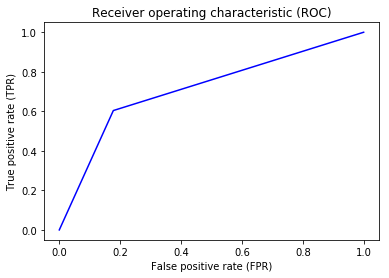

In [28]:
gnb = GaussianNB()
modelfit(gnb)

Model:  GaussianNB(priors=None)
Metrics

Training data Confusion Matrix
[[3926  811]
 [ 445  713]]
Accuracy on Train:  0.7869380831212892
AUC Score on Train:  0.7222556743790751

Test data Confusion Matrix
[[1320  285]
 [ 143  218]]
Accuracy on Test:  0.7822990844354019
AUC Score on Test:  0.7131540114427732
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.90      0.82      0.86      1605
          1       0.43      0.60      0.50       361

avg / total       0.82      0.78      0.80      1966

Area under the ROC curve: 0.7131540114427732


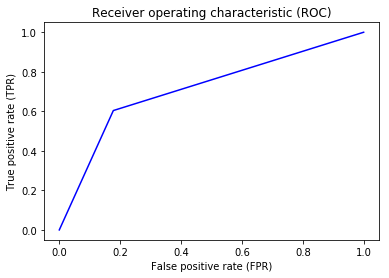

In [29]:
clf = SVC()
modelfit(gnb)

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Metrics

Training data Confusion Matrix
[[4737    0]
 [   2 1156]]
Accuracy on Train:  0.9996607294317218
AUC Score on Train:  0.9991364421416236

Test data Confusion Matrix
[[1358  247]
 [ 211  150]]
Accuracy on Test:  0.7670396744659207
AUC Score on Test:  0.6308091921885383
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.87      0.85      0.86      1605
          1       0.38      0.42      0.40       361

avg / total       0.78      0.77      0.77      1966

Area under the ROC curve: 0.6308091921885383


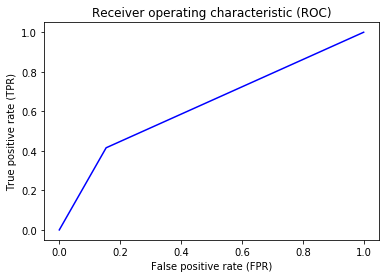

In [30]:
classifier = DecisionTreeClassifier()
modelfit(classifier)

Model:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Metrics

Training data Confusion Matrix
[[4636  101]
 [ 399  759]]
Accuracy on Train:  0.9151823579304496
AUC Score on Train:  0.8170594515013001

Test data Confusion Matrix
[[1458  147]
 [ 216  145]]
Accuracy on Test:  0.8153611393692777
AUC Score on Test:  0.6550366324073834
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.87      0.91      0.89      1605
          1       0.50      0.40      0.44       361

avg / total       0.80      0.82      0.81      1966

Area under the ROC curve: 0.6550366324073834


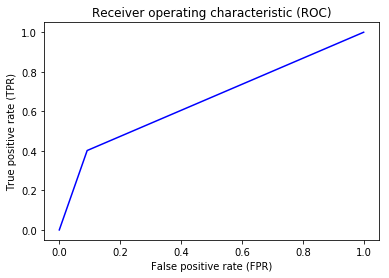

In [31]:
classifier_new = DecisionTreeClassifier(criterion='entropy', max_depth=10)
modelfit(classifier_new)

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Metrics

Training data Confusion Matrix
[[4608  129]
 [ 413  745]]
Accuracy on Train:  0.9080576759966072
AUC Score on Train:  0.8080590894523435

Test data Confusion Matrix
[[1471  134]
 [ 241  120]]
Accuracy on Test:  0.8092573753814852
AUC Score on Test:  0.6244604378629801
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.86      0.92      0.89      1605
          1       0.47      0.33      0.39       361

avg / total       0.79      0.81      0.80      1966

Area under the ROC curve: 0.6244604378629801


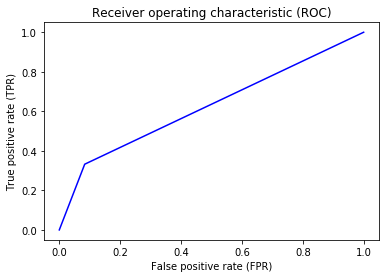

In [37]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=10, min_samples_leaf=5)
modelfit(clf_gini)

Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Metrics

Training data Confusion Matrix
[[4547  190]
 [ 603  555]]
Accuracy on Train:  0.8654792196776929
AUC Score on Train:  0.7195824186401616

Test data Confusion Matrix
[[1426  179]
 [ 298   63]]
Accuracy on Test:  0.7573753814852492
AUC Score on Test:  0.5314943778531425
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1605
          1       0.26      0.17      0.21       361

avg / total       0.72      0.76      0.74      1966

Area under the ROC curve: 0.5314943778531425


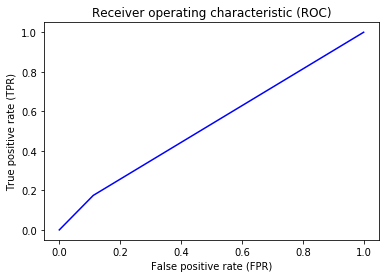

In [33]:
knn = KNeighborsClassifier()
modelfit(knn)

Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Metrics

Training data Confusion Matrix
[[4734    3]
 [  69 1089]]
Accuracy on Train:  0.9877862595419847
AUC Score on Train:  0.9698905977745473

Test data Confusion Matrix
[[1538   67]
 [ 252  109]]
Accuracy on Test:  0.8377416073245167
AUC Score on Test:  0.6300972549425704
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.86      0.96      0.91      1605
          1       0.62      0.30      0.41       361

avg / total       0.82      0.84      0.81      1966

Area under the ROC curve: 0.6300972549425704


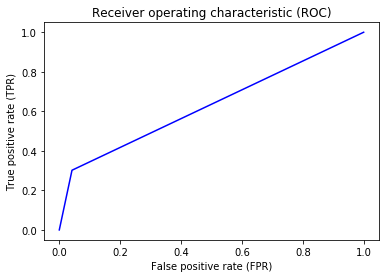

In [34]:
rf = RandomForestClassifier()
modelfit(rf)

Model:  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Metrics

Training data Confusion Matrix
[[4459  278]
 [ 708  450]]
Accuracy on Train:  0.8327396098388464
AUC Score on Train:  0.6649570518058149

Test data Confusion Matrix
[[1503  102]
 [ 224  137]]
Accuracy on Test:  0.8341810783316378
AUC Score on Test:  0.6579749915861962
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.87      0.94      0.90      1605
          1       0.57      0.38      0.46       361

avg / total       0.82      0.83      0.82      1966

Area under the ROC curve: 0.6579749915861962


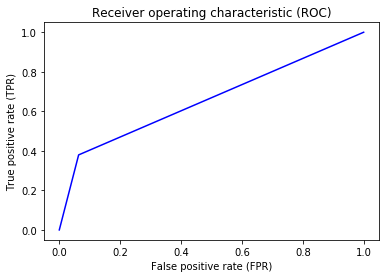

In [38]:
lda = LinearDiscriminantAnalysis()
modelfit(lda)

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Metrics

Training data Confusion Matrix
[[4523  214]
 [ 772  386]]
Accuracy on Train:  0.8327396098388464
AUC Score on Train:  0.6440785307156428

Test data Confusion Matrix
[[1516   89]
 [ 232  129]]
Accuracy on Test:  0.8367243133265514
AUC Score on Test:  0.6509445034129839
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.87      0.94      0.90      1605
          1       0.59      0.36      0.45       361

avg / total       0.82      0.84      0.82      1966

Area under the ROC curve: 0.6509445034129839


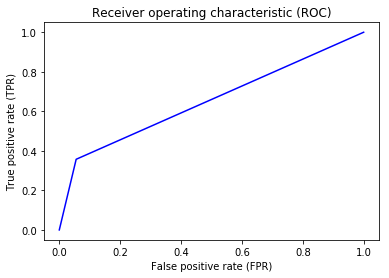

In [48]:
LR = LogisticRegression()
modelfit(LR)

In [44]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import BaggingClassifier

Model:  AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=500, random_state=None)
Metrics

Training data Confusion Matrix
[[4737    0]
 [   2 1156]]
Accuracy on Train:  0.9996607294317218
AUC Score on Train:  0.9991364421416236

Test data Confusion Matrix
[[1375  230]
 [ 210  151]]
Accuracy on Test:  0.7761953204476093
AUC Score on Test:  0.637490183895548
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.87      0.86      0.86      1605
          1       0.40      0.42      0.41       361

avg / total       0.78      0.78      

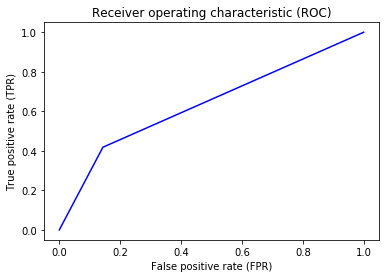

In [45]:
a_dt = DecisionTreeClassifier() 
a_clf = AdaBoostClassifier(n_estimators=500, base_estimator=a_dt,learning_rate=0.05)
modelfit(a_clf)

Model:  AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=GaussianNB(priors=None), learning_rate=0.1,
          n_estimators=1200, random_state=None)
Metrics

Training data Confusion Matrix
[[4046  691]
 [ 598  560]]
Accuracy on Train:  0.7813401187446989
AUC Score on Train:  0.66885974267179

Test data Confusion Matrix
[[1361  244]
 [ 194  167]]
Accuracy on Test:  0.7772126144455748
AUC Score on Test:  0.6552894779989817
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.88      0.85      0.86      1605
          1       0.41      0.46      0.43       361

avg / total       0.79      0.78      0.78      1966

Area under the ROC curve: 0.6552894779989817


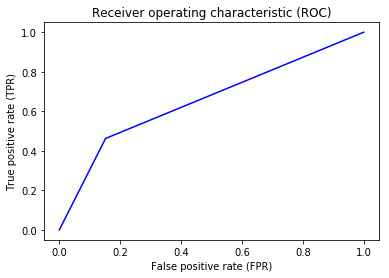

In [46]:
a_gnb = GaussianNB() 
a_clf_1 = AdaBoostClassifier(n_estimators=1200, base_estimator=a_gnb,learning_rate=0.1)
modelfit(a_clf_1)

Model:  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=1200,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=7, subsample=0.85, verbose=0,
              warm_start=False)
Metrics

Training data Confusion Matrix
[[4521  216]
 [ 505  653]]
Accuracy on Train:  0.8776929601357082
AUC Score on Train:  0.7591524007345984

Test data Confusion Matrix
[[1482  123]
 [ 217  144]]
Accuracy on Test:  0.82706002034588
AUC Score on Test:  0.6611282263701556
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.87      0.92      0.90      1605
          1       0.54      0.40      0.46       361

avg / total       0.81      0.83      0.82      19

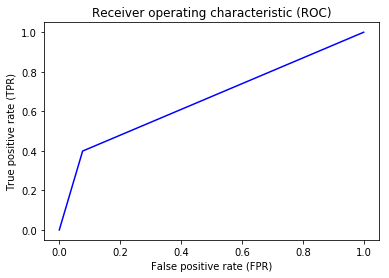

In [47]:
a_gbt = GradientBoostingClassifier(learning_rate=1,min_samples_split=1200,subsample=0.85, random_state=7, max_features='sqrt')
modelfit(a_gbt)

Model:  BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.8,
         max_samples=0.8, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
Metrics

Training data Confusion Matrix
[[4671   66]
 [ 916  242]]
Accuracy on Train:  0.8334181509754028
AUC Score on Train:  0.5975240664113729

Test data Confusion Matrix
[[1553   52]
 [ 329   32]]
Accuracy on Test:  0.8062054933875891
AUC Score on Test:  0.5281219526928488
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.83      0.97      0.89      1605
          1       0.38      0.09      0.14       361

avg / total       0.74      0.81      0.75      1966

Area under the ROC curve: 0.5281219526928488


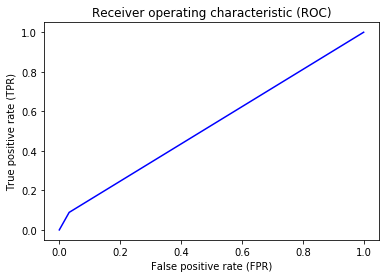

In [49]:
knn = KNeighborsClassifier()
bagging = BaggingClassifier(knn, n_estimators=10, max_samples=0.8, max_features=0.8)
modelfit(bagging)

Model:  BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.8, max_samples=0.8,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
Metrics

Training data Confusion Matrix
[[4726   11]
 [ 149 1009]]
Accuracy on Train:  0.9728583545377438
AUC Score on Train:  0.9345038671422525

Test data Confusion Matrix
[[1525   80]
 [ 253  108]]
Accuracy on Test:  0.830620549338759
AUC Score on Test:  0.6246623691545637
Classification report on Test: 

             precision    recall  f1-score   support

          0       0.86      0.95      0.90      1605
          1       0.57      0.30      0.39       361

avg / total       0.81      0.83      0.81      1966

Area under the ROC curve: 0.6246623691545637


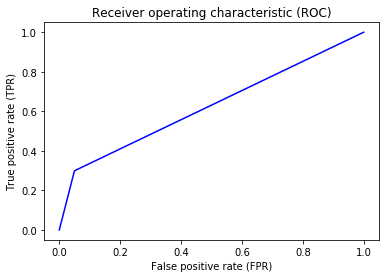

In [51]:
bagging = BaggingClassifier(n_estimators=10, max_samples=0.8, max_features=0.8)
modelfit(bagging)

### VIF

In [52]:
from subprocess import check_output

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=100.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=100.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [54]:
transformer = ReduceVIF()

vif_data = transformer.fit_transform(data[pred_var],data['FlightDelayStatus'])

vif_data.head()

ReduceVIF fit
ReduceVIF transform
Dropping D_StationPressure with vif=30164.987917820803
Dropping D_GroundHeight with vif=5127.920307224758
Dropping O_GroundHeight with vif=4734.016479907038
Dropping O_StationPressure with vif=662.4084532143189
Dropping O_DBT with vif=341.0900040597441
Dropping D_BarometerHeight with vif=310.57353868188693
Dropping O_BarometerHeight with vif=301.6494124885
Dropping D_DBT with vif=220.61409792185574


,Month,DayofMonth,distance_bin,Traveltime_bin,Origin_Point,Dept_bin,O_HourlyPrecip,O_SkyConditions,O_Visibility,O_DewPointTemp,...,D_SkyConditions,D_Visibility,D_DewPointTemp,D_RelativeHumidityPercent,D_WindSpeed,D_WindDirection,D_WindGustValue,D_StationHeight,D_Latitude,D_Longitude
0,7.0,4.0,3.0,3.0,135.0,0.0,0.0,4.0,10.0,71.0,...,2.0,10.0,75.0,63.0,7.0,360.0,0.0,20.0,29.59,-90.15
1,1.0,2.0,2.0,2.0,195.0,2.0,0.0,2.0,10.0,44.0,...,0.0,3.0,49.0,96.0,8.0,160.0,0.0,732.0,34.12,-118.22
2,7.0,5.0,2.0,2.0,15.0,0.0,0.0,1.0,10.0,65.0,...,2.0,9.0,70.0,71.0,6.0,210.0,0.0,883.0,39.02,-84.40
3,11.0,22.0,3.0,3.0,181.0,0.0,0.0,4.0,10.0,54.0,...,2.0,5.0,46.0,86.0,0.0,0.0,0.0,883.0,39.02,-84.40
4,9.0,27.0,1.0,1.0,79.0,2.0,0.0,4.0,10.0,74.0,...,2.0,10.0,59.0,60.0,10.0,180.0,0.0,31.0,40.47,-73.53
